## **Crime Prediction**

### Load dataset

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [43]:
data_path = "/content/drive/MyDrive/ML_project/crime_features_updated.csv"
df = pd.read_csv(data_path)
field_names = list(df.columns)

data_path = "/content/drive/MyDrive/ML_project/NYPD_Complaint_Data_Current__Year_To_Date__20250325.csv"
df2 = pd.read_csv(data_path)
field_names = list(df.columns)

<ipython-input-43-a9220319e253>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(data_path)


In [44]:
df

,ADDR_PCT_CD,JURIS_DESC,LOC_OF_OCCUR_DESC,OFNS_DESC,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,LAW_CAT_CD,duration,crime_hour,crime_dayofweek
0,-0.617852,7,2,35,47,0,0,0,31,7,2,0,0.000000,0.888979,0.0
1,-0.447108,7,2,51,52,27,4,2,31,3,2,0,0.000000,0.423055,0.0
2,-0.845509,17,2,4,62,28,5,3,16,5,2,0,0.000000,-2.061875,0.0
3,1.487982,7,0,44,72,0,0,0,32,5,1,0,0.034684,0.423055,1.0
4,0.264322,7,0,51,72,27,3,2,15,3,2,0,0.011992,0.112438,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577103,1.061124,7,2,7,62,28,5,1,16,3,2,0,3.056453,-0.664102,1.0
577104,1.174953,7,0,25,62,16,3,2,17,3,2,2,0.068721,0.888979,1.0
577105,1.174953,7,2,23,64,28,5,2,18,5,2,0,2.780371,-2.061875,1.0
577106,1.402611,7,2,34,64,16,3,2,17,7,4,0,0.049811,-0.974718,1.0


In [45]:
# prepare targets
print (pd.unique(df2['LAW_CAT_CD']))
print (pd.value_counts(df2['LAW_CAT_CD']))

# Map LAW_CAT_CD to binary classification
df['serious_crime'] = df2['LAW_CAT_CD']
df['serious_crime'] = df['serious_crime'].map({'FELONY':'1','MISDEMEANOR':'1','VIOLATION':'0'},na_action=None)

['FELONY' 'VIOLATION' 'MISDEMEANOR']
LAW_CAT_CD
MISDEMEANOR    299929
FELONY         188418
VIOLATION       88761
Name: count, dtype: int64


<ipython-input-45-817e7d045d13>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print (pd.value_counts(df2['LAW_CAT_CD']))


In [46]:
# Check the distribution of serious crimes
df_serious_crime = df['serious_crime']
print(pd.unique(df_serious_crime))
print(pd.value_counts(df_serious_crime))

['1' '0']
serious_crime
1    488347
0     88761
Name: count, dtype: int64


<ipython-input-46-cc48300ee0f7>:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df_serious_crime))


In [47]:
# Convert 'serious_crime' to numeric
df_serious_crime = pd.to_numeric(df_serious_crime)
print(df_serious_crime.dtypes)
print(pd.unique(df_serious_crime))

# Preparing features
features = list(df)
features.remove('serious_crime')
features.remove('LAW_CAT_CD')
print(features)


int64
[1 0]
['ADDR_PCT_CD', 'JURIS_DESC', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PREM_TYP_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'duration', 'crime_hour', 'crime_dayofweek']


In [48]:
df[features]

,ADDR_PCT_CD,JURIS_DESC,LOC_OF_OCCUR_DESC,OFNS_DESC,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,duration,crime_hour,crime_dayofweek
0,-0.617852,7,2,35,47,0,0,0,31,7,2,0.000000,0.888979,0.0
1,-0.447108,7,2,51,52,27,4,2,31,3,2,0.000000,0.423055,0.0
2,-0.845509,17,2,4,62,28,5,3,16,5,2,0.000000,-2.061875,0.0
3,1.487982,7,0,44,72,0,0,0,32,5,1,0.034684,0.423055,1.0
4,0.264322,7,0,51,72,27,3,2,15,3,2,0.011992,0.112438,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577103,1.061124,7,2,7,62,28,5,1,16,3,2,3.056453,-0.664102,1.0
577104,1.174953,7,0,25,62,16,3,2,17,3,2,0.068721,0.888979,1.0
577105,1.174953,7,2,23,64,28,5,2,18,5,2,2.780371,-2.061875,1.0
577106,1.402611,7,2,34,64,16,3,2,17,7,4,0.049811,-0.974718,1.0


### Modeling

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [62]:
y = df_serious_crime
x = np.array(df[features])
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.3)

In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

#### Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [91]:
# Initial Random Forest Classifier
rfc = RandomForestClassifier(random_state=0, n_jobs=-1)

# Cross-validation for baseline model (without tuning)
score_pre = cross_val_score(rfc, X_train, y_train, cv=2, scoring='f1_weighted').mean()
print(f'Baseline F1 Score (Weighted): {score_pre:.4f}')

# Hyperparameter Tuning: n_estimators (find optimal value)
score_list = []
for i in range(0, 200, 20):  # Testing different n_estimators values from 1 to 200
    rfc = RandomForestClassifier(n_estimators=i+1, random_state=90)
    score = cross_val_score(rfc, X_train, y_train, cv=2, scoring='f1_weighted').mean()
    score_list.append(score)
score_max = max(score_list)
print(f'Max F1 Score: {score_max:.4f}, Optimal n_estimators: {score_list.index(score_max)*20 + 1}')


Baseline F1 Score (Weighted): 0.9979
Max F1 Score: 0.9979, Optimal n_estimators: 41


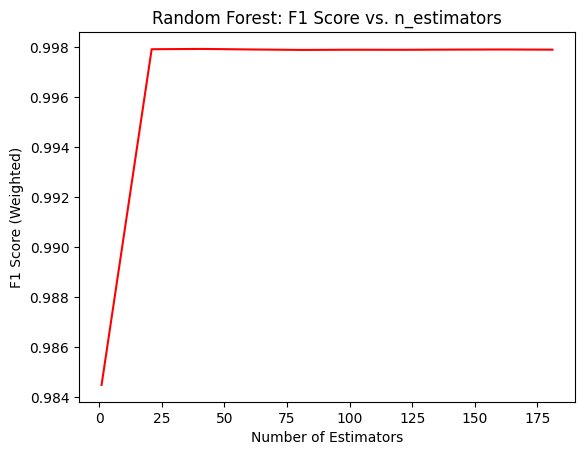

In [92]:
# Plot the learning curve for n_estimators
aa = np.arange(1, 201, 20)
plt.subplot(111)
plt.plot(aa, score_list, 'r-')
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score (Weighted)')
plt.title('Random Forest: F1 Score vs. n_estimators')
plt.show()

In [93]:
# Building the model with the best n_estimators
rfc_best_n_estimators = RandomForestClassifier(n_estimators=41, random_state=90)

In [94]:
# Tuning max_depth hyperparameter using GridSearchCV
param_grid = {'max_depth': np.arange(1, 20, 2)}
grid_search = GridSearchCV(rfc_best_n_estimators, param_grid, cv=2, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
best_param = grid_search.best_params_
best_score = grid_search.best_score_

In [95]:
# Building the model with the best parameters (n_estimators=38 and max_depth=13)
best_model = grid_search.best_estimator_

# Tuning min_samples_split hyperparameter using GridSearchCV
param_grid = {'min_samples_split': np.arange(2, 21, 2)}
grid_search_split = GridSearchCV(best_model, param_grid, cv=2, scoring='f1_weighted')
grid_search_split.fit(X_train, y_train)
best_split_param = grid_search_split.best_params_
best_split_score = grid_search_split.best_score_

In [96]:
# Use the best model to predict and evaluate
best_model_split = grid_search_split.best_estimator_
y_pred_rf_best = best_model_split.predict(X_test)

# Evaluate the model
f1_score_rf_best = f1_score(y_test, y_pred_rf_best, average="weighted")
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best, average='weighted')
recall_rf_best = recall_score(y_test, y_pred_rf_best, average='weighted')

print(f'Accuracy = {accuracy_rf_best:.4f}')
print(f'Precision = {precision_rf_best:.4f}')
print(f'Recall = {recall_rf_best:.4f}')
print(f'F1 Score = {f1_score_rf_best:.4f}')

Accuracy = 0.9982
Precision = 0.9982
Recall = 0.9982
F1 Score = 0.9982


In [99]:
# Feature importance plot
importances_rfc = best_model_split.feature_importances_
indices_rfc = np.argsort(importances_rfc)[::-1]

print("Feature Importances:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. {features[f]}: {importances_rfc[indices_rfc[f]]:.4f}")

Feature Importances:
1. ADDR_PCT_CD: 0.8514
2. JURIS_DESC: 0.0321
3. LOC_OF_OCCUR_DESC: 0.0266
4. OFNS_DESC: 0.0157
5. PREM_TYP_DESC: 0.0139
6. SUSP_AGE_GROUP: 0.0137
7. SUSP_RACE: 0.0098
8. SUSP_SEX: 0.0091
9. VIC_AGE_GROUP: 0.0071
10. VIC_RACE: 0.0069
11. VIC_SEX: 0.0063
12. duration: 0.0053
13. crime_hour: 0.0016
14. crime_dayofweek: 0.0004


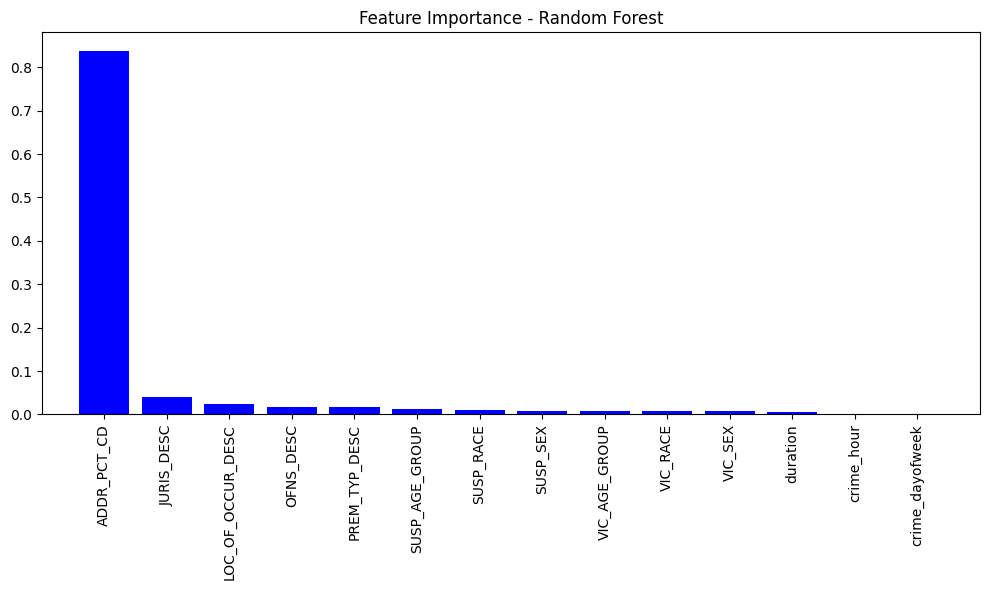

In [102]:
# Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance - Random Forest')
plt.bar(range(X_train.shape[1]), importances_rfc[indices_rfc], color='blue', align='center')
plt.xticks(range(X_train.shape[1]), features, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

#### Logistic Regression

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [75]:
# Define the parameter grid for hyperparameter tuning
param_dist = {
    'C': np.logspace(-3, 3, 7),  # Range of regularization strengths
    'penalty': ['l2', 'l1'],  # Regularization types
    'solver': ['liblinear', 'saga'],  # Optimization algorithms
}

In [76]:
# Initialize Logistic Regression model
LR = LogisticRegression(max_iter=1000)

# Initialize RandomizedSearchCV with 5-fold cross-validation and a limited number of iterations
random_search = RandomizedSearchCV(estimator=LR, param_distributions=param_dist,
                                   n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=42)

In [77]:
# Fit the RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ['l2', 'l1'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, verbose=1)

In [78]:
# Get the best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': np.float64(0.001)}


In [80]:
# Train the model using the best hyperparameters
best_LR = random_search.best_estimator_

# Make predictions
y_pred_lr = best_LR.predict(X_test)

# Evaluate the model
print('Accuracy = ', accuracy_score(y_test, y_pred_lr))
print('Precision = ', precision_score(y_test, y_pred_lr, average='weighted'))
print('Recall = ', recall_score(y_test, y_pred_lr, average='weighted'))
print('F1 Score = ', f1_score(y_test, y_pred_lr, average='weighted'))

Accuracy =  0.8444548410759358
Precision =  0.7676030052952685
Recall =  0.8444548410759358
F1 Score =  0.7765964546631638


In [81]:
# Feature importance using coefficients
importances_lr = best_LR.coef_[0]
indices_lr = np.argsort(importances_lr)[::-1]
for f in range(X_train.shape[1]):
    print(f"{f + 1}. {features[f]}: {importances_lr[indices_lr[f]]}")

1. ADDR_PCT_CD: 0.7650850842372141
2. JURIS_DESC: 0.49238363478675934
3. LOC_OF_OCCUR_DESC: 0.15322345986355326
4. OFNS_DESC: 0.06801530389412783
5. PREM_TYP_DESC: 0.06354004789349324
6. SUSP_AGE_GROUP: 0.015098249049344559
7. SUSP_RACE: 0.008342842623159055
8. SUSP_SEX: -0.031611800263431265
9. VIC_AGE_GROUP: -0.06834751874738762
10. VIC_RACE: -0.08218456496799155
11. VIC_SEX: -0.08886949816415042
12. duration: -0.11946171937179627
13. crime_hour: -0.1488752124024917
14. crime_dayofweek: -0.49614413463343027


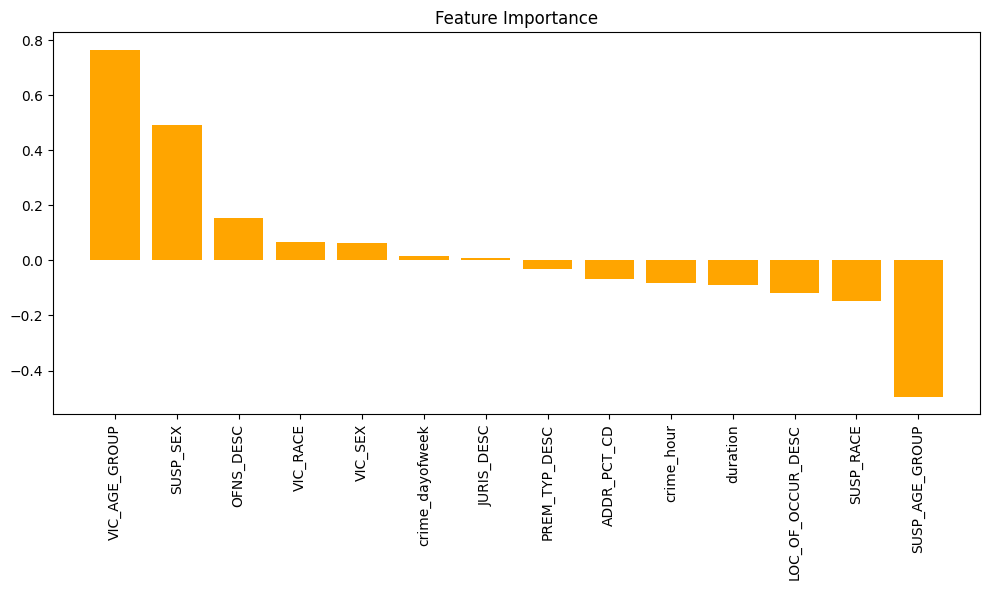

In [85]:
# Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances_lr[indices_lr], color='orange', align='center')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices_lr], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

#### XGBoost

In [110]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# Hyperparameter tuning for XGBClassifier
param_grid = {
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinking
    'n_estimators': [50, 100, 150],  # Number of boosting rounds
}

# Instantiate the XGBClassifier
xgbc = XGBClassifier(importance_type='cover', random_state=42)

In [111]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgbc, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type='cover',
                                     interaction_constraints=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_weighted', verbose=1)

In [112]:
# Train the model with the best parameters
xgbc_best = grid_search.best_estimator_

# Predict using the tuned model
y_pred_xgbc = xgbc_best.predict(X_test)

# Calculate performance metrics
accuracy_xgbc = accuracy_score(y_test, y_pred_xgbc)
print('Accuracy = ', accuracy_xgbc)
precision_xgbc = precision_score(y_test, y_pred_xgbc, average="weighted")
print('Precision = ', precision_xgbc)
recall_xgbc = recall_score(y_test, y_pred_xgbc, average="weighted")
print('Recall = ', recall_xgbc)
f1_score_xgbc = f1_score(y_test, y_pred_xgbc, average="weighted")
print('F1 Score = ', f1_score_xgbc)

Accuracy =  0.9985329197784363
Precision =  0.9985337706253752
Recall =  0.9985329197784363
F1 Score =  0.9985305748713889


('ADDR_PCT_CD', np.float32(0.015973592))
('JURIS_DESC', np.float32(0.03187189))
('LOC_OF_OCCUR_DESC', np.float32(0.01899912))
('OFNS_DESC', np.float32(0.4432487))
('PREM_TYP_DESC', np.float32(0.021573018))
('SUSP_AGE_GROUP', np.float32(0.04833936))
('SUSP_RACE', np.float32(0.006591011))
('SUSP_SEX', np.float32(0.008728876))
('VIC_AGE_GROUP', np.float32(0.060755245))
('VIC_RACE', np.float32(0.03035101))
('VIC_SEX', np.float32(0.23973013))
('duration', np.float32(0.016319744))
('crime_hour', np.float32(0.010143576))
('crime_dayofweek', np.float32(0.047374785))


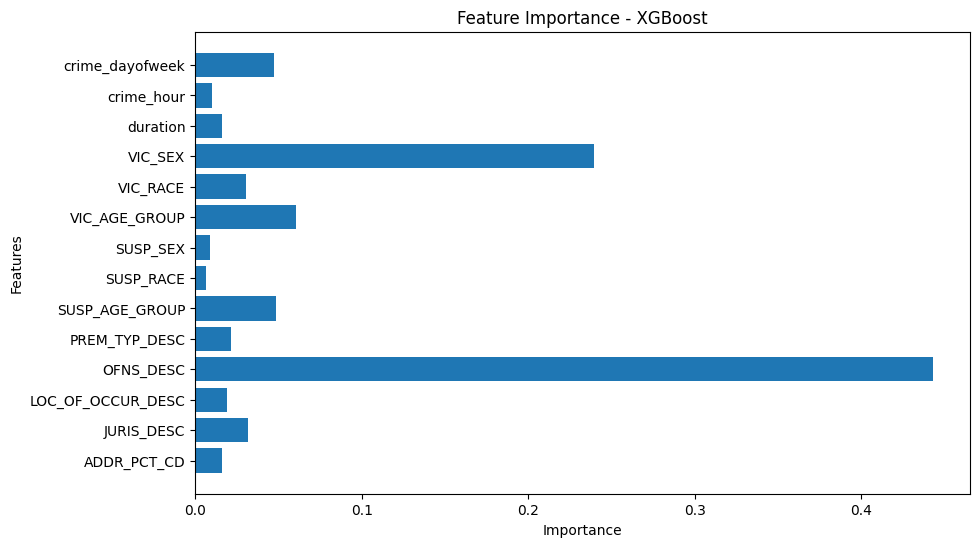

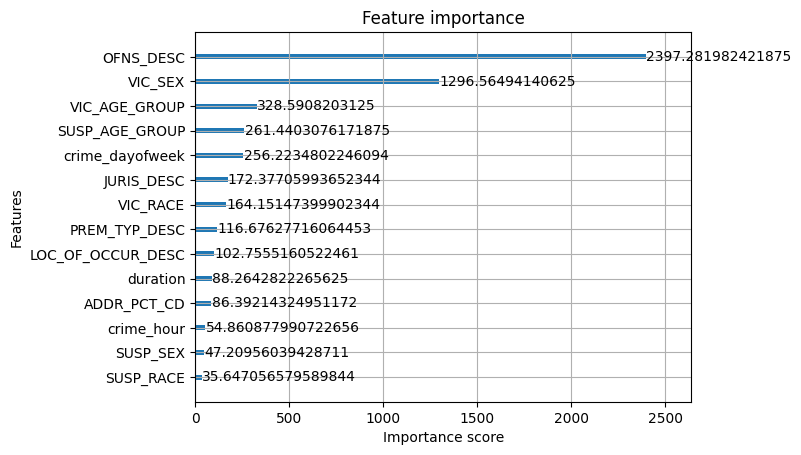

In [113]:
# Calculate and print feature importances
xgbc_best.get_booster().feature_names = features
importances_xgbc_2 = zip(features, xgbc_best.feature_importances_)
for f in importances_xgbc_2:
    print(f)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, xgbc_best.feature_importances_)
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Plot feature importance using plot_importance
plot_importance(xgbc_best, importance_type='cover')
plt.show()